   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


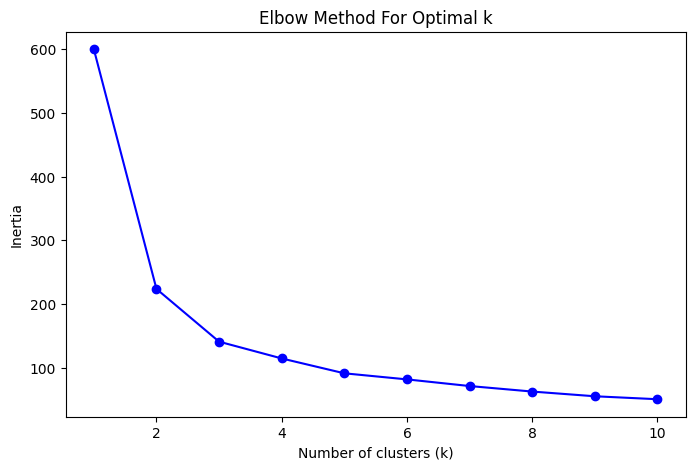

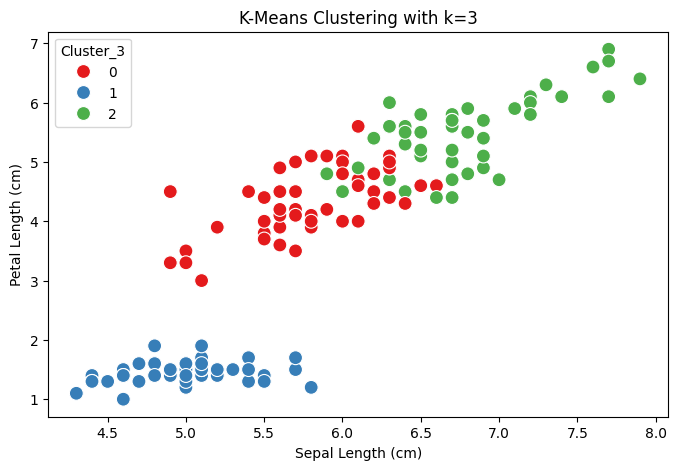

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris_data = pd.read_csv('./datasets/Iris.csv')
print(iris_data.head())

# Drop 'Id' and 'Species' columns for clustering
iris_data = iris_data.drop(columns=['Id', 'Species'])

# Check for missing values
print(iris_data.isnull().sum())

# Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)

# Checking the first few rows of the scaled data
print(pd.DataFrame(iris_scaled, columns=iris_data.columns).head())

# Apply KMeans clustering for a range of cluster numbers (1 to 10)
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(iris_scaled)  # Fit on the scaled data
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with k=3 (chosen based on the elbow plot)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
iris_data['Cluster_3'] = kmeans_3.fit_predict(iris_scaled)

# Visualizing the clusters using Sepal and Petal length/width
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=iris_data['SepalLengthCm'],
    y=iris_data['PetalLengthCm'],
    hue=iris_data['Cluster_3'],
    palette='Set1',
    s=100
)
plt.title('K-Means Clustering with k=3')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()
